In [1]:
import pandas as pd

# Читаємо csv файл
df = pd.read_csv('bestsellers_with_categories.csv')

# Виводимо перші п'ять рядків
print(df.head())

# Виводимо розміри датасету
print(f"Розмір датасету: {df.shape}")

# Виводимо кількість книг
print(f"Кількість книг: {df.shape[0]}")

# Змінюємо назви колонок
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Виводимо оновлені назви колонок
print(df.columns)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
Розмір датасету: (550, 7)
Кількість книг: 550
Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
['Non Fiction' 'Fiction']


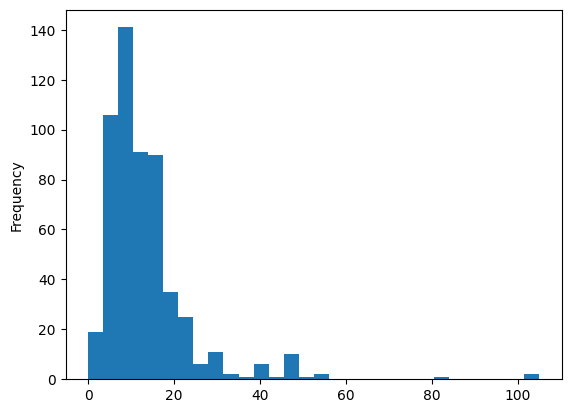

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [2]:
import matplotlib.pyplot as plt

# Перевіряємо, чи у всіх рядків вистачає даних
print(df.isna().sum())

# Перевіряємо унікальні значення в колонці genre
print(df['genre'].unique())

# Будуємо діаграму розподілу цін
df['price'].plot(kind='hist', bins=30)
plt.show()

# Визначаємо статистичні характеристики цін
print(f"Максимальна ціна: {df['price'].max()}")
print(f"Мінімальна ціна: {df['price'].min()}")
print(f"Середня ціна: {df['price'].mean()}")
print(f"Медіанна ціна: {df['price'].median()}")

In [3]:
# Знаходимо максимальний рейтинг
max_rating = df['user_rating'].max()
print(f"Максимальний рейтинг: {max_rating}")

# Знаходимо кількість книг з максимальним рейтингом
books_with_max_rating = df[df['user_rating'] == max_rating]
print(f"Кількість книг з максимальним рейтингом: {len(books_with_max_rating)}")

# Знаходимо книгу з найбільшим кількістю відгуків
most_reviewed_book = df.loc[df['reviews'].idxmax()]
print(f"Книга з найбільшим кількістю відгуків: {most_reviewed_book['name']}")

# Знаходимо найдорожчу книгу жанру Fiction, що потрапила до Топ-50 у 2015 році
expensive_fiction_book = df[(df['genre'] == 'Fiction') & (df['year'] == 2015)].sort_values('price', ascending=False).iloc[0]
print(f"Найдорожчу книга жанру Fiction, що потрапила до Топ-50 у 2015 році: {expensive_fiction_book['name']}")

# Знаходимо кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році
fiction_books_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
print(f"Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: {len(fiction_books_2010)}")

# Знаходимо кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках
books_with_rating_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]
print(f"Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: {len(books_with_rating_4_9)}")

# Сортуємо за зростанням ціни книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів
cheap_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price', ascending=True)
print(f"Кількість книг, що потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів: {len(cheap_books_2015)}")

# Виводимо назву останньої книги у відсортованому списку
last_book_in_sorted_list = cheap_books_2015.iloc[-1]['name']
print(f"Назва останньої книги у відсортованому списку: {last_book_in_sorted_list}")

Максимальний рейтинг: 4.9
Кількість книг з максимальним рейтингом: 52
Книга з найбільшим кількістю відгуків: Where the Crawdads Sing
Найдорожчу книга жанру Fiction, що потрапила до Топ-50 у 2015 році: Go Set a Watchman: A Novel
Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: 20
Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: 1
Кількість книг, що потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів: 17
Назва останньої книги у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


In [5]:
# Групуємо за жанром та знаходимо максимальну та мінімальну ціни
price_by_genre = df.groupby('genre')['price'].agg(['max', 'min'])
print(price_by_genre)

# Групуємо за автором та рахуємо кількість книг
books_by_author = df.groupby('author')['name'].count().reset_index(name='book_count')
print(books_by_author)

# Групуємо за автором та знаходимо середній рейтинг
rating_by_author = df.groupby('author')['user_rating'].mean().reset_index(name='average_rating')
print(rating_by_author)

# З'єднуємо датафрейми
combined_df = pd.concat([books_by_author.set_index('author'), rating_by_author.set_index('author')], axis=1)

# Сортуємо датафрейм за зростанням кількості книг та рейтингу
sorted_df = combined_df.sort_values(by=['book_count', 'average_rating'])

# Виводимо першого автора у відсортованому списку
print(f"Автор перший у списку: {sorted_df.index[0]}")

             max  min
genre                
Fiction       82    0
Non Fiction  105    0
                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]
                         author  average_rating
0              Abraham Verghese        4.600000
1                Adam Gasiewski        4.400000
2                 Adam Mansbach        4.800000
3                     Adir Levy        4.800000
4    Admiral William H. McRaven        4.700000
..                          ...             ...
243             Walter I

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


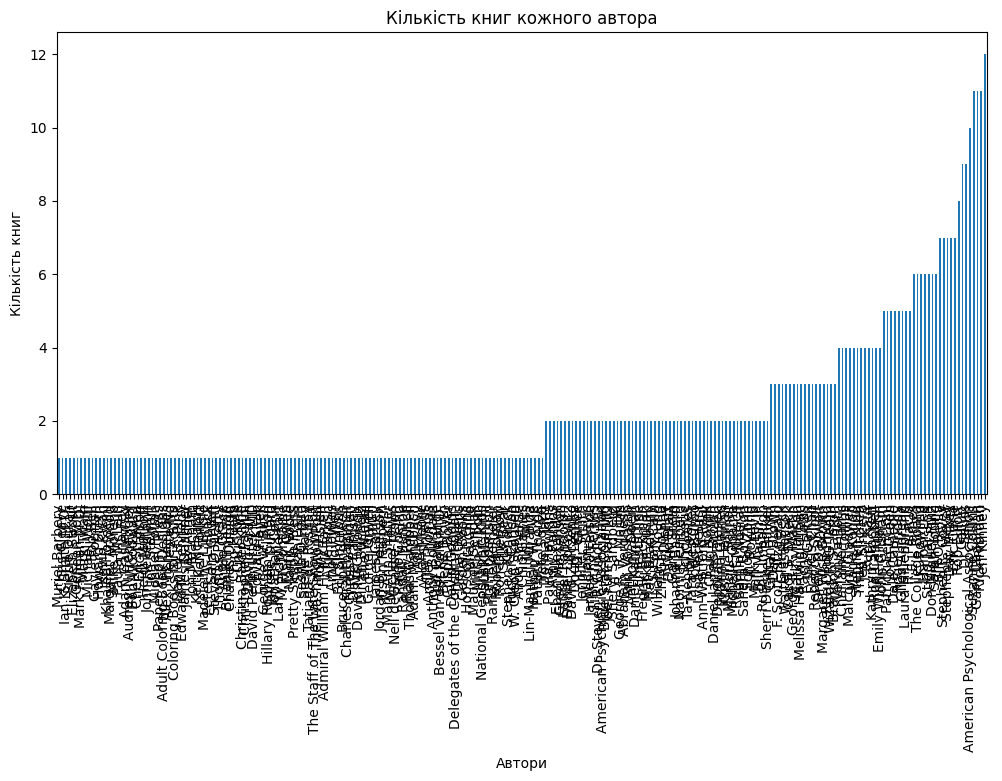

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


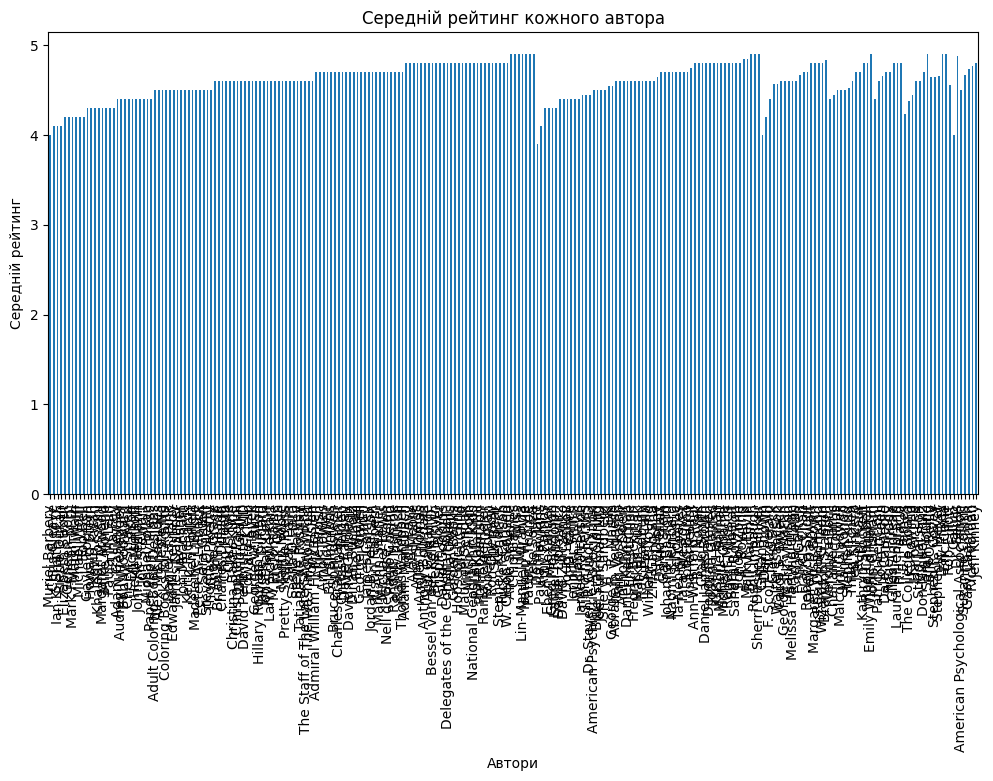

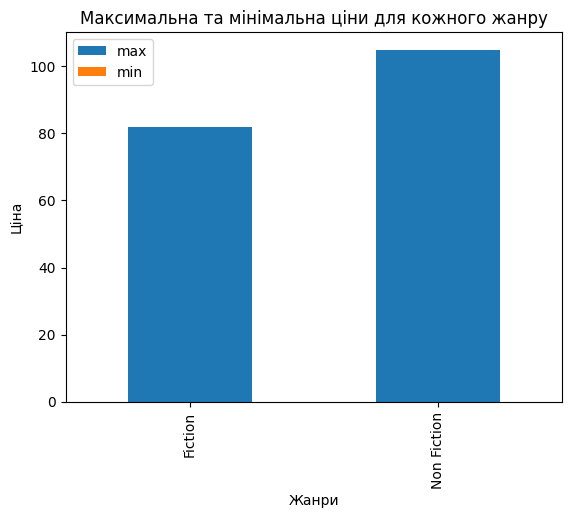

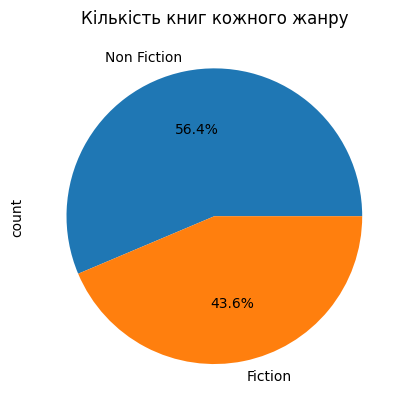

In [7]:
# Графік кількості книг кожного автора
plt.figure(figsize=(12, 6))
sorted_df['book_count'].plot(kind='bar')
plt.title('Кількість книг кожного автора')
plt.xlabel('Автори')
plt.ylabel('Кількість книг')
plt.show()

# Графік середнього рейтингу кожного автора
plt.figure(figsize=(12, 6))
sorted_df['average_rating'].plot(kind='bar')
plt.title('Середній рейтинг кожного автора')
plt.xlabel('Автори')
plt.ylabel('Середній рейтинг')
plt.show()

# Графік максимальної та мінімальної ціни для кожного жанру
price_by_genre.plot(kind='bar', stacked=True)
plt.title('Максимальна та мінімальна ціни для кожного жанру')
plt.xlabel('Жанри')
plt.ylabel('Ціна')
plt.show()

# Графік кількості книг кожного жанру
genre_counts = df['genre'].value_counts()
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Кількість книг кожного жанру')
plt.show()